![SNARS](https://pbs.twimg.com/media/FhgxHGxWAAUF05y?format=jpg&name=medium)

#### In this projects: 
    1. Non-physicality of ER graphs  
    2. Stochastic block model
    3. Watts-Strogatz model 
    4. Other Projects  
    
![SNAR](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

### <font color = #950CDF> Part 1: </font> <font color = #4854E8> Import the Libraries </font>

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from matplotlib import pyplot as plt
from scipy.io import mmread
import seaborn as sns
from sklearn.linear_model import LinearRegression
import pandas as pd
import powerlaw as po

![SNAR](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## <font color = #41EA46> Excercise P5.1 </font>
Complete the missing calculations.

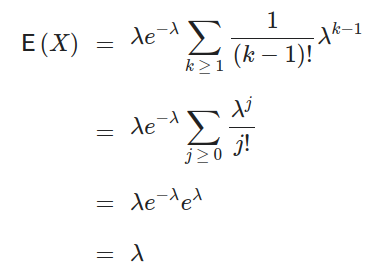

In [139]:
from IPython.display import Image
Image(filename='poisson_mean.png') 

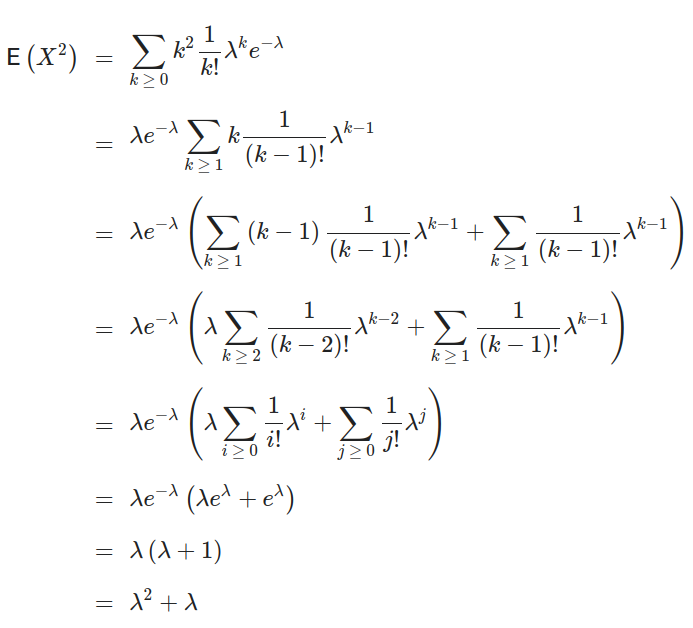

In [141]:
Image(filename='poisson_var.png')

![SNAR](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## <font color = #41EA46> Excercise P5.2 </font>
Check the above analytical result by simulation.

In [1]:
n=100

In [4]:
mean_list=np.zeros(100)

In [16]:
var_list=np.zeros(100)

In [24]:
for i in range(100):
    G=nx.erdos_renyi_graph(n=n, p=0.5, seed=i)

    mean_list[i]=np.array(list(nx.clustering(G).values())).mean()

    var_list[i]=np.array(list(nx.clustering(G).values())).var()

mean_list.mean()

0.00016254361381264204

In [25]:
for i in range(100):
    G=nx.erdos_renyi_graph(n=n, p=0.75, seed=i)

    mean_list[i]=np.array(list(nx.clustering(G).values())).mean()

    var_list[i]=np.array(list(nx.clustering(G).values())).var()

mean_list.mean()

0.7492174097225694

In [26]:
for i in range(100):
    G=nx.erdos_renyi_graph(n=n, p=0.25, seed=i)

    mean_list[i]=np.array(list(nx.clustering(G).values())).mean()

    var_list[i]=np.array(list(nx.clustering(G).values())).var()

mean_list.mean()

0.24960788617037907

![SNAR](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## <font color = #41EA46> Excercise P5.3</font>
Generate and draw a graph consisting of 4 community each with N = 20 nodes and the probability of connection within the community higher than between them. Draw the result. How it depends on the parameter values?

In [6]:
p_in=0.7

p_out=0.1

In [7]:
R=np.random.sample(size=(4*20,4*20))

A=np.ones((4*20,4*20))*p_out

A[0:20,0:20]=p_in
A[20:40,20:40]=p_in
A[40:60,40:60]=p_in
A[60:80,60:80]=p_in

A=(A>R)*1

A=np.triu(A, k=0)

In [122]:
G = nx.from_numpy_matrix(A)

In [123]:
np.array(list(nx.clustering(G).values())).mean()

0.3844898123919947

In [133]:
color_map=["red"]*20+["blue"]*20+["yellow"]*20+["green"]*20

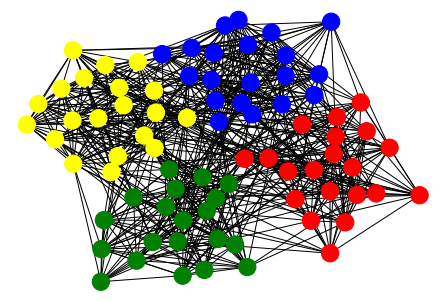

In [134]:
nx.draw(G,node_color=color_map)

![SNAR](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## <font color = #41EA46> Excercise P5.4</font>
Draw a graph of the averaged coefﬁcient of clustering of the WS network against its parameter p.

In [162]:
P=np.linspace(0,1)

In [163]:
mean_list=np.zeros(len(P))

In [166]:
for i in range(len(P)):
    G=nx.watts_strogatz_graph(n=40, k=5, p=P[i], seed=123)
    mean_list[i]=np.array(list(nx.clustering(G).values())).mean()

<AxesSubplot:>

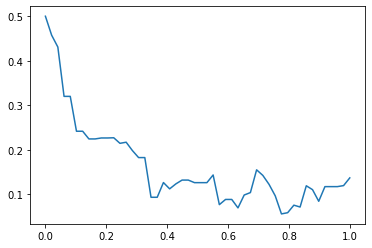

In [167]:
sns.lineplot(x=P,y=mean_list)

![SNAR](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## <font color = #41EA46> Excercise P5.5</font>
With (or without) Mathematica solve ER model in the case of GN;E.

In [ ]:
#code

![SNAR](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## <font color = #41EA46> Excercise P5.6</font>
Implement configuration model and test when the procedure converge. 

In [243]:
def G_seq(degseq):
    n=len(degseq)
    #degseq=sorted(degseq)[::-1]
    mat = [[0] * n for i in range(n)]
 
    for i in range(n):
        for j in range(i + 1, n):
            # For each pair of vertex decrement
            # the degree of both vertex.
            if (degseq[i] > 0 and degseq[j] > 0):+
                degseq[i] -= 1
                degseq[j] -= 1
                mat[i][j] = 1
                mat[j][i] = 1
                
    return np.array(mat)


In [263]:
def can_be_created(seq):
    seq1=np.sort(seq)[::-1]
    seq2=seq1.copy()
    A=G_seq(seq1)
    return (np.sum(A,axis=1)==seq2).all()

In [264]:
high=10

In [274]:
seq=np.sort(np.random.randint(1, high, high+1))[::-1]

In [275]:
seq

array([9, 8, 7, 6, 5, 4, 4, 2, 2, 1, 1])

In [278]:
can_be_created([3,1,2,1,1])

True

In [280]:
import itertools

In [287]:
np.arange(1,4)

array([1, 2, 3])

In [299]:
possible=[list(x) for x in itertools.combinations_with_replacement(np.arange(1,4), r=4) if sum(list(x))%2==0]

In [300]:
possible

[[1, 1, 1, 1],
 [1, 1, 1, 3],
 [1, 1, 2, 2],
 [1, 1, 3, 3],
 [1, 2, 2, 3],
 [1, 3, 3, 3],
 [2, 2, 2, 2],
 [2, 2, 3, 3],
 [3, 3, 3, 3]]

In [301]:
[can_be_created(x) for x in possible]

[True, True, True, False, True, False, False, True, True]

![SNAR](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## <font color = #41EA46> Excercise P5.7</font>
Compute partition function and distribution of the network with given hamiltonian for the case with fixed number of edges.

![SNAR](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)